# Nearest Neighbors Graph

Work by Harry Xue

Visualization of world countries using a network graph. First we calculate the k nearest neighbors for each of the countries with respect to food consumption and then visualize the relationships with countries represented as nodes and edges between countries that have the most similar consumption habits.

In [58]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from NetworkxD3.NetworkxD3 import simpleNetworkx
from IPython.display import IFrame 
%matplotlib inline  

In [3]:
# Load cleaned food dataframe
out = open('data/imputed/food_1970_2000_cleaned.p', 'r')
food_1970_2000 = pickle.load(out)
out.close()

In [4]:
print food_1970_2000.shape
food_1970_2000.head()

(154, 109)


,Oilcrops,Plantains,"Sugar, Raw Equivalent","Beverages, Alcoholic",Roots & Tuber Dry Equiv,Vegetable Oils,Olives (including preserved),Cloves,Coconuts - Incl Copra,Treenuts,...,Offals,Bovine Meat,"Molluscs, Other","Fish, Body Oil","Aquatic Animals, Others",Animal fats,Honey,"Offals, Edible",Demersal Fish,Cream
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.629000,29.068781,14.402000,0.002333,8.539333,7.995000,0.065333,29.068781,0.015000,2.327333,...,9.166000,16.762667,29.068781,29.068781,29.068781,6.513000,0.687667,9.166000,29.068781,0.000000
Albania,7.044333,32.502693,50.132333,3.201000,10.253333,20.501000,7.017667,32.502693,0.006333,4.350000,...,6.729333,18.681000,0.416000,0.000000,0.000000,8.995000,0.488667,6.734667,0.604000,0.005333
Algeria,1.646000,0.000000,69.079333,0.108667,15.592333,33.352667,1.432667,0.004667,0.012000,1.453667,...,3.079333,9.742333,0.001000,0.000000,0.000000,5.180333,0.247333,3.079333,0.950333,25.450712
Angola,3.671667,26.325172,26.933333,1.855000,157.302000,21.056000,26.325172,0.000000,0.000000,0.401000,...,3.521333,21.081000,0.000333,0.000000,0.000000,1.588000,5.557000,3.521333,3.859667,26.325172
Argentina,1.813000,44.950187,113.051667,10.766000,41.883333,35.942667,1.235333,0.000333,0.584000,1.133000,...,19.928000,192.834333,0.675000,0.000000,0.000000,10.627667,0.505000,19.933333,13.161333,0.157000


In [5]:
# For a given country, find its k nearest neighbors based on Euclidean distance of food consumption
def find_k_nearest_neighbors(country, k, df):
    # Initialize array to store distances to every other country
    distances = pd.Series(index=df.index)
    
    for other_country in distances.index:
        # Calculate distance between the country and every other country besides itself
        if other_country != country:
            distances[other_country] = np.linalg.norm(df.ix[country] - df.ix[other_country])
        # Set country's distance to itself None so it's never chosen
        else:
            distances[other_country] = None
    
    return distances.nsmallest(k)

In [50]:
# Set k to be 3 for readability, since we have a lot of countries
k = 3

In [51]:
find_k_nearest_neighbors("United States of America", k, food_1970_2000)

Country
Canada         250.479628
New Zealand    258.573159
Australia      269.327328
dtype: float64

In [52]:
find_k_nearest_neighbors("China", k, food_1970_2000)

Country
India           349.263218
Nepal           372.342003
Sierra Leone    403.871077
dtype: float64

These results look interesting, but also plausible so we're off to a good start.

In [53]:
# Calculate k closest neighbors for each country
neighbors_dict = {}
countries = food_1970_2000.index

for country in countries:
    neighbors_dict[country] = find_k_nearest_neighbors(country, k, food_1970_2000)

## Create graph using nearest neighbor data

In [54]:
G = nx.Graph()
# Add a node for each country
G.add_nodes_from(food_1970_2000.index)
# Add an edge between countries that are neighbors to one another in food consumption
for country in neighbors_dict:
    for other_country, distance in neighbors_dict[country].iteritems():
        G.add_edge(country, other_country, weight=distance)

In [55]:
print G.number_of_nodes(), G.number_of_edges()

154 339


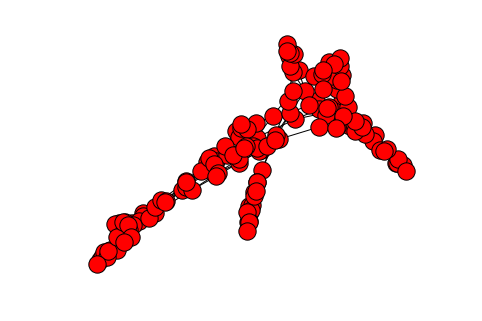

In [56]:
# Visualize static plot
nx.draw(G)

Hmm...this is a start but it would be much more informative (and cooler!) if we could make this an interactive network graph, so we'll do that next.

## Interactive network graph using NetworkxD3
We'll use [NetworkxD3](https://github.com/Jverma/NetworkxD3) in order to spice our boring static viz up and turn it into an interactive one (spicy!).

In [70]:
# Writes visualization to a file called Net.html
simpleNetworkx(G)

In [71]:
IFrame('Net.html', width=1000, height=1000)

Much better! The length of an edge corresponds to the distance between the countries in food consumption habits. We see that for the most part there are some geographical correlations in that countries with similar diets tend to be near one another in graph proximity but there are some interesting outliers as well.